In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('propiedades_argenprop.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8685 entries, 0 to 8684
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   URL                  8685 non-null   object 
 1   Ubicación            8685 non-null   object 
 2   Precio               8685 non-null   object 
 3   Sup. cubierta        7168 non-null   object 
 4   Antiguedad           3589 non-null   object 
 5   Baños                7730 non-null   object 
 6   Ambientes            6947 non-null   object 
 7   Disposición          1176 non-null   object 
 8   Expensas             8685 non-null   object 
 9   Dormitorios          6524 non-null   object 
 10  Cocheras             4353 non-null   object 
 11  Estado               2306 non-null   object 
 12  Orientación          1291 non-null   object 
 13  Apto profesional     612 non-null    object 
 14  Toilettes            437 non-null    object 
 15  Permite mascota      59 non-null     o

In [19]:
df.describe(include=object)

,URL,Ubicación,Precio,Sup. cubierta,Antiguedad,Baños,Ambientes,Disposición,Expensas,Dormitorios,...,Superficie cubierta,Cantidad baños,Agua corriente,Tipo de cochera,Tipo de cobertura,Tipo de coche,Tipo de acceso,Altura Techo,Habitaciones,Descripción
count,8685,8685,8685,7168,3589,7730,6947,1176,8685,6524,...,3,1,27,7,7,4,6,13,1,1
unique,6687,5654,623,551,90,14,21,6,477,13,...,3,1,1,1,2,2,3,8,1,1
top,https://www.argenprop.com/departamento-en-alqu...,Oro al 2100,Consultar precio,200 m² Cubierta,A Estrenar,1 baño,4 ambientes,Frente,No se encontraron expensas,3 dormitorios,...,1.500 m² Cubierta,2 baños,Agua corri.,Fija,Cubierta,Mediano,Ascensor,8 mts Altura,12 habitaci.,CLÍNICA DE ESPECIAL...
freq,2,63,293,170,836,2742,1481,827,5656,2036,...,1,1,27,7,6,3,3,3,1,1


In [198]:
# Identificar cuántos precios están en dólares y cuántos en pesos.
# Crear una columna booleana que indique si el precio está en dólares.
# Convertir los precios en dólares a pesos usando dos tipos de cambio.

# Contar cuántos precios están en dólares y cuántos en pesos
dolares_count = df[df['Precio'].str.contains('USD')].shape[0]
pesos_count = df.shape[0] - dolares_count
consultar_count = df[df['Precio'] == 'Consultar precio'].shape[0]

print(f"Precios en dólares: {dolares_count}")
print(f"Precios en pesos: {pesos_count}")
print(f"Consultar precio: {consultar_count}")

Precios en dólares: 6163
Precios en pesos: 2522
Consultar precio: 293


In [199]:
# Para simplificar y presentar los resultados de una manera más comprensible, 
# vamos a calcular las proporciones o porcentajes 
# y luego presentarlos en un formato amigable.

# Cáculo de proporciones

total = dolares_count + pesos_count + consultar_count

prop_dolares = dolares_count / total
prop_pesos = pesos_count / total
prop_consulta = consultar_count / total

print (f'La proporción en dólares es de {prop_dolares}')
print (f'La proporción en pesos es de {prop_pesos}')
print (f'La proporción de consultar precio es de {prop_consulta}')

La proporción en dólares es de 0.686455780797505
La proporción en pesos es de 0.28090888839385164
La proporción de consultar precio es de 0.03263533080864335


In [200]:
# Convertir a un formato comprensible:

simplif_dolares = round(prop_dolares * 10)
simplif_pesos = round(prop_pesos * 10)
simplif_consulta = round(prop_consulta * 10)

print(f"{simplif_dolares} de cada 10 departamentos / casa se alquilan en dólares.")
print(f"{simplif_pesos} de cada 10 departamentos se alquilan en pesos.")
print(f"{simplif_consulta} de cada 10 departamentos no dicen el precio.")



7 de cada 10 departamentos / casa se alquilan en dólares.
3 de cada 10 departamentos se alquilan en pesos.
0 de cada 10 departamentos no dicen el precio.


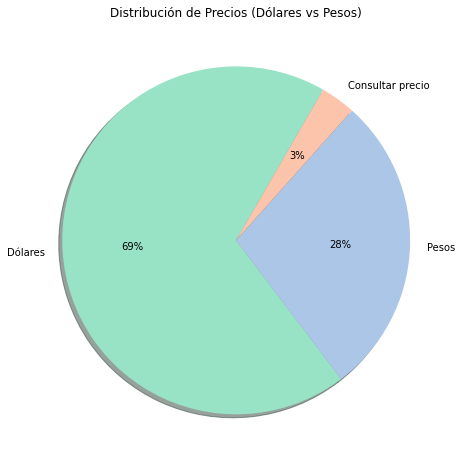

In [201]:
# Gráfica distribución de precios entre precios en dólares y precios en pesos


labels = ['Dólares', 'Pesos', 'Consultar precio']
sizes = [dolares_count, pesos_count, consultar_count]
colors = ['#98e2c6', '#acc6e8', '#fbc4ab']
explode = (0, 0, 0)  # Esto hará que la sección de "Dólares" resalte un poco

# Gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%', shadow=True, startangle=60)
plt.title('Distribución de Precios (Dólares vs Pesos)')
plt.show()

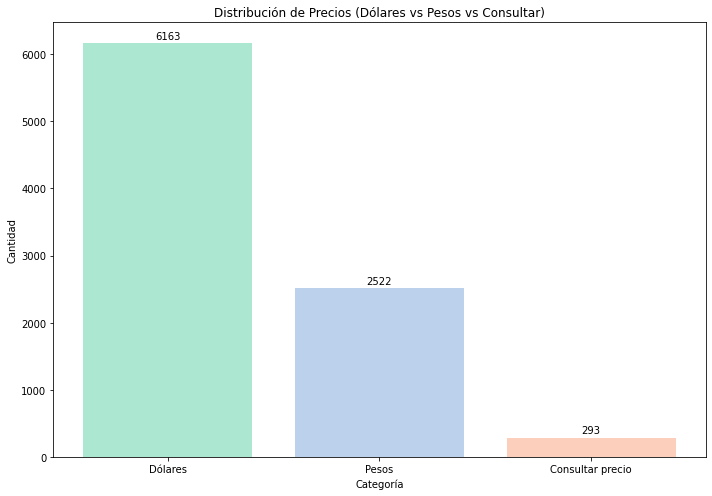

In [63]:
# Gráfica distribución de precios entre precios en dólares y precios en pesos

labels = ['Dólares', 'Pesos', 'Consultar precio']
sizes = [dolares_count, pesos_count, consultar_count]
colors = ['#98e2c6', '#acc6e8', '#fbc4ab']
#explode = (0, 0, 0)  # Esto hará que la sección de "Dólares" resalte un poco

# Crear gráfico de barras
y_pos = np.arange(len(labels))
plt.figure(figsize=(10, 7))
bars = plt.bar(y_pos, sizes, align='center', color=colors, alpha=0.8)

# Etiquetas, título y ejes
plt.xticks(y_pos, labels)
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.title('Distribución de Precios (Dólares vs Pesos vs Consultar)')

# Añadir la cantidad sobre cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 30, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

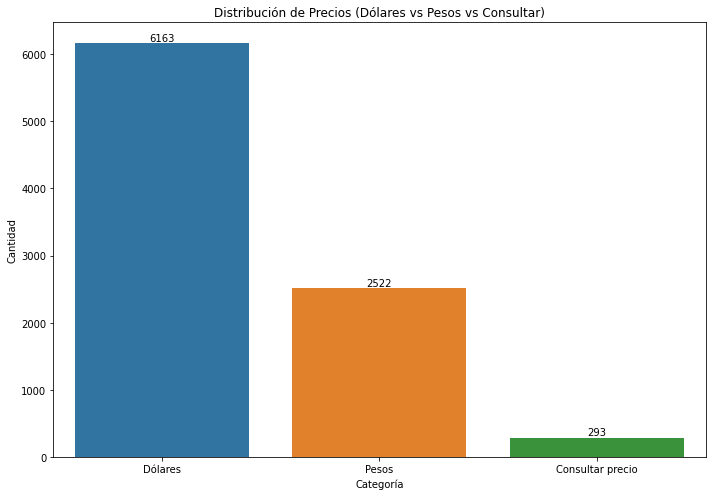

In [61]:
# Gráfico de barras con Seaborn
plt.figure(figsize=(10, 7))
ax = sns.barplot(x=labels, y=sizes)

# Etiquetas, título y ejes
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.title('Distribución de Precios (Dólares vs Pesos vs Consultar)')

# Añadir la cantidad sobre cada barra
for index, value in enumerate(sizes):
    ax.text(index, value + 30, str(value), ha="center")

plt.tight_layout()
plt.show()

In [203]:
# Crear una columna booleana que indique si el precio está en dólares.
df['es_dolar'] = df['Precio'].str.contains('USD')

<Axes: ylabel='es_dolar'>

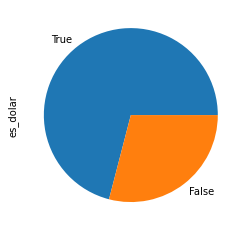

In [204]:
df.es_dolar.value_counts().plot.pie()

In [205]:
# Convertir los precios en dólares a pesos usando dos tipos de cambio.


def convert_to_pesos(precio, es_dolar, cambio_oficial=365, cambio_informal=730):
    try:
        if es_dolar:
            precio_numerico = float(precio.replace('USD', '').replace('.', '').strip())
            return precio_numerico * cambio_oficial, precio_numerico * cambio_informal
        else:
            precio_numerico = float(precio.replace('$', '').replace('.', '').strip())
            return precio_numerico, precio_numerico
    except ValueError:
        # Si no se puede convertir a flotante, devuelve NaN
        return np.nan, np.nan


df['Precio_oficial'], df['Precio_informal'] = zip(*df.apply(lambda row: convert_to_pesos(row['Precio'], row['es_dolar']), axis=1))


In [113]:
df[['Precio_oficial', 'Precio_informal', 'Precio']].describe()

,Precio_oficial,Precio_informal
count,8.392000e+03,8.392000e+03
mean,1.052817e+06,1.930257e+06
std,6.443950e+06,1.182935e+07
min,6.500000e+01,6.500000e+01
25%,2.400000e+05,3.650000e+05
50%,4.580750e+05,8.760000e+05
75%,9.125000e+05,1.752000e+06
max,4.015000e+08,8.030000e+08


In [114]:
# Configura el número máximo de caracteres a mostrar
pd.set_option('display.max_colwidth', None)

df['URL']

0          https://www.argenprop.com/departamento-en-alquiler-en-almagro-1-ambiente--8295344
1         https://www.argenprop.com/departamento-en-alquiler-en-almagro-2-ambientes--1714296
2        https://www.argenprop.com/departamento-en-alquiler-en-almagro-2-ambientes--14148444
3         https://www.argenprop.com/departamento-en-alquiler-en-almagro-2-ambientes--8911134
4        https://www.argenprop.com/departamento-en-alquiler-en-almagro-2-ambientes--13151793
                                                ...                                         
8680            https://www.argenprop.com/casa-en-alquiler-en-arroyito-6-ambientes--14294873
8681    https://www.argenprop.com/departamento-en-alquiler-en-arroyito-4-ambientes--14295320
8682    https://www.argenprop.com/departamento-en-alquiler-en-arroyito-4-ambientes--14295364
8683           https://www.argenprop.com/oficina-en-alquiler-en-centro-7-ambientes--12006195
8684      https://www.argenprop.com/departamento-en-alquiler-en-centro

In [189]:
# Crear función para de extraer información de la URL, aquí podemos extraer tipo de alquiler, y barrio

import re

def extract_info(url):
    pattern = r"www\.argenprop\.com\/(?P<tipo>\w+)-en-\w+-en-(?P<barrio>[\w-]+)(-(?P<ambientes>\d+)-ambientes)?--\d+"
    match = re.search(pattern, url)
    
    if match:
        tipo = match.group('tipo')
        barrio = match.group('barrio').replace('-', ' ')
        ambientes = match.group('ambientes')
        
        # En caso de que no haya información sobre ambientes, colocamos None
        if not ambientes:
            ambientes = None
        
        return tipo, barrio, ambientes
    else:
        return None, None, None

df['Tipo'], df['Barrio'], df['Ambientes_url'] = zip(*df['URL'].apply(extract_info))



In [193]:
# Extraemos la cantidad de ambientes de la columna 'Barrio'
df['Ambientes_url'] = df['Barrio'].str.extract(r'(\d+) ambientes?', expand=False)

# Luego, eliminamos la parte de "X ambientes" del nombre del barrio
df['Barrio'] = df['Barrio'].str.replace(r' \d+ ambientes?', '', regex=True)


In [196]:
df.Barrio.value_counts()

palermo                       816
recoleta                      787
belgrano                      682
nordelta                      518
centro                        313
                             ... 
villa adelina                   1
la merced                       1
san isidro barrio carreras      1
ayres chico                     1
las heras                       1
Name: Barrio, Length: 536, dtype: int64

In [214]:
df.Tipo.value_counts()

departamento    4129
casa            3008
local            647
oficina          589
galpon           138
ph                49
cochera           42
terreno           36
campo              4
quinta             1
hotel              1
Name: Tipo, dtype: int64

In [209]:
df['Barrio'].value_counts()

palermo                       816
recoleta                      787
belgrano                      682
nordelta                      518
centro                        313
                             ... 
villa adelina                   1
la merced                       1
san isidro barrio carreras      1
ayres chico                     1
las heras                       1
Name: Barrio, Length: 536, dtype: int64

In [210]:
alquileres_en_dolares = df[df['es_dolar']]
barrios_dolares_counts = alquileres_en_dolares['Barrio'].value_counts()
barrios_dolares_counts


recoleta                      647
palermo                       642
nordelta                      506
belgrano                      495
palermo chico                 166
                             ... 
acassuso el cano rio            1
san isidro vias rolon           1
beccar alto                     1
san isidro vias libertador      1
bella vista                     1
Name: Barrio, Length: 416, dtype: int64

In [211]:
total_por_tipo = df.groupby('Tipo').size()

dolares_por_tipo = df[df['es_dolar']].groupby('Tipo').size()
pesos_por_tipo = total_por_tipo - dolares_por_tipo

porcentaje_dolares = (dolares_por_tipo / total_por_tipo) * 100
porcentaje_pesos = 100 - porcentaje_dolares

print("Porcentaje en Dólares por Tipo:")
print(porcentaje_dolares)

print("\nPorcentaje en Pesos por Tipo:")
print(porcentaje_pesos)


Porcentaje en Dólares por Tipo:
Tipo
campo           50.000000
casa            83.909574
cochera          2.380952
departamento    77.234197
galpon          19.565217
hotel                 NaN
local           15.146832
oficina         46.689304
ph              40.816327
quinta                NaN
terreno         19.444444
dtype: float64

Porcentaje en Pesos por Tipo:
Tipo
campo           50.000000
casa            16.090426
cochera         97.619048
departamento    22.765803
galpon          80.434783
hotel                 NaN
local           84.853168
oficina         53.310696
ph              59.183673
quinta                NaN
terreno         80.555556
dtype: float64


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8685 entries, 0 to 8684
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   URL                  8685 non-null   object 
 1   Ubicación            8685 non-null   object 
 2   Precio               8685 non-null   object 
 3   Sup. cubierta        7168 non-null   object 
 4   Antiguedad           3589 non-null   object 
 5   Baños                7730 non-null   object 
 6   Ambientes            6947 non-null   object 
 7   Disposición          1176 non-null   object 
 8   Expensas             8685 non-null   object 
 9   Dormitorios          6524 non-null   object 
 10  Cocheras             4353 non-null   object 
 11  Estado               2306 non-null   object 
 12  Orientación          1291 non-null   object 
 13  Apto profesional     612 non-null    object 
 14  Toilettes            437 non-null    object 
 15  Permite mascota      59 non-null     o

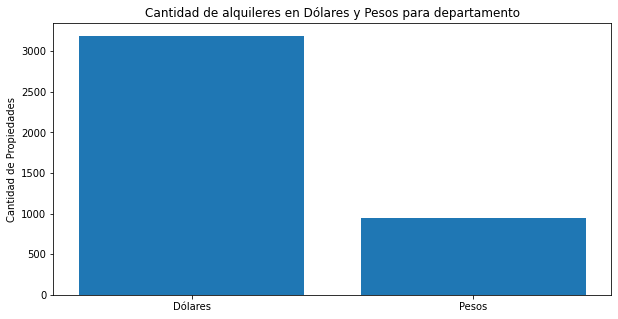

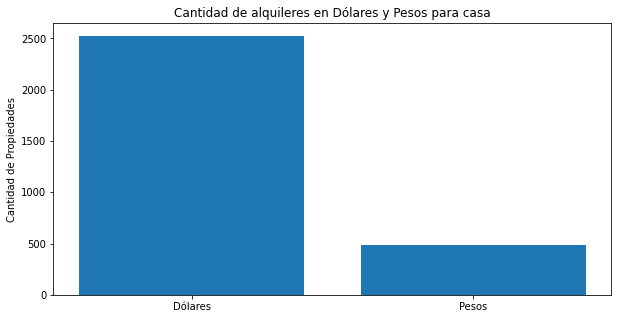

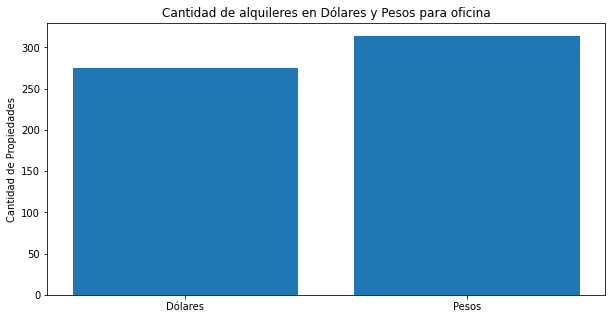

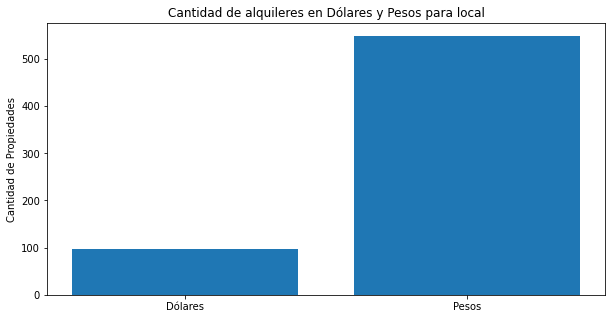

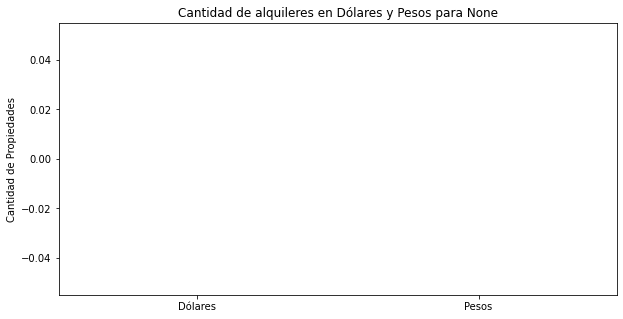

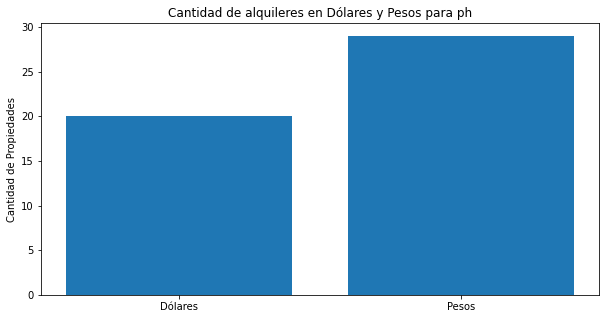

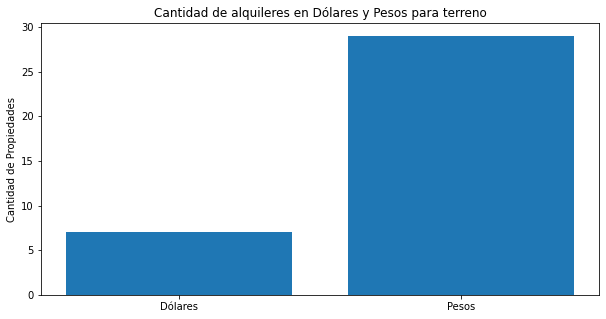

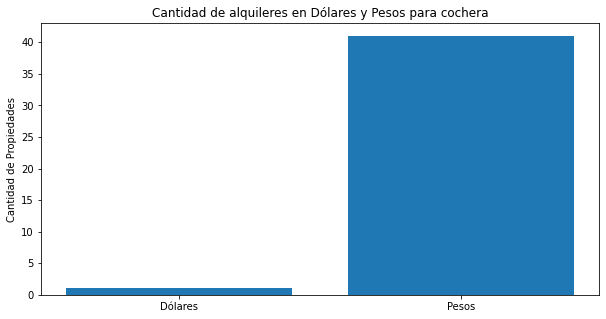

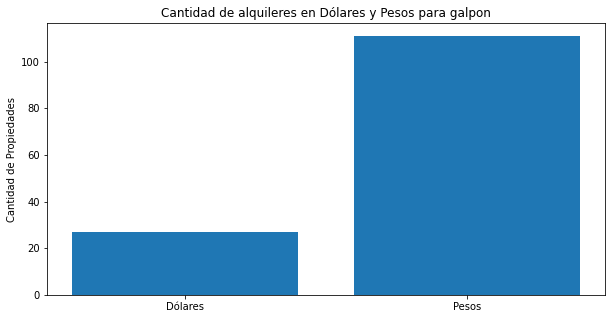

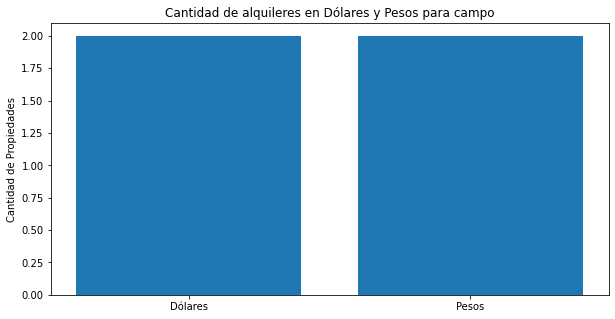

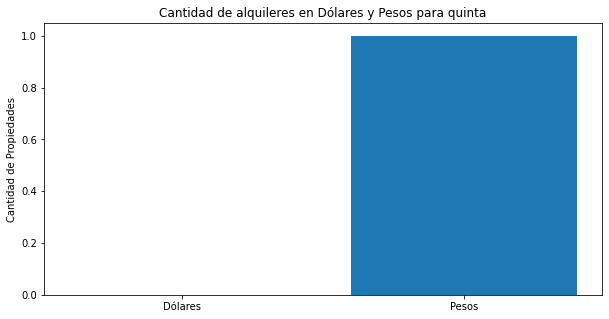

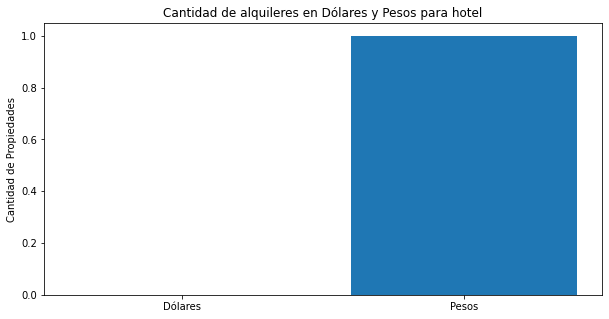

In [223]:
tipos = df['Tipo'].unique()

for tipo in tipos:
    subset = df[df['Tipo'] == tipo]
    
    # Contamos cuántos están en dólares y cuántos en pesos
    dolares_count = subset['es_dolar'].sum()
    pesos_count = len(subset) - dolares_count
    
    # Gráfico de barras
    labels = ['Dólares', 'Pesos']
    values = [dolares_count, pesos_count]
    
    plt.figure(figsize=(10, 5))
    plt.bar(labels, values)
    plt.title(f'Cantidad de alquileres en Dólares y Pesos para {tipo}')
    plt.ylabel('Cantidad de Propiedades')
    plt.show()
    


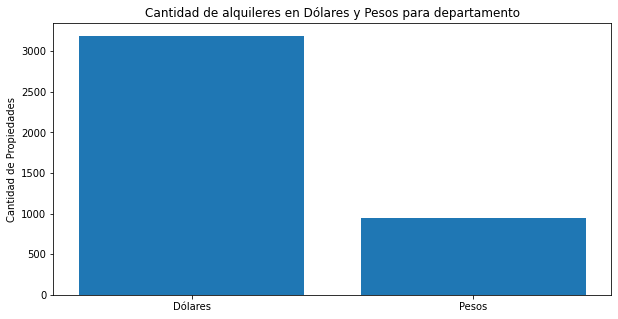

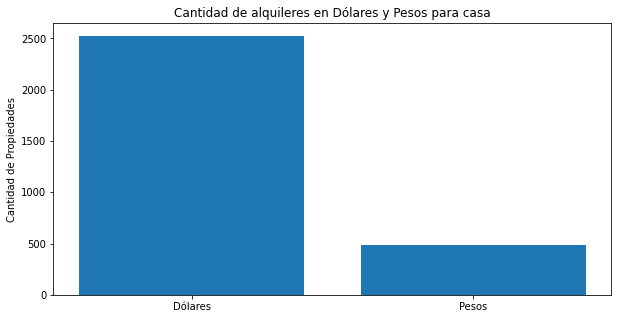

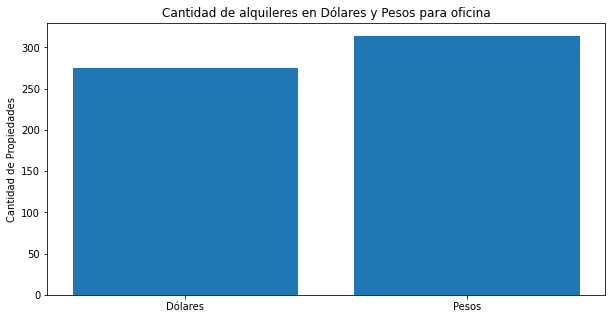

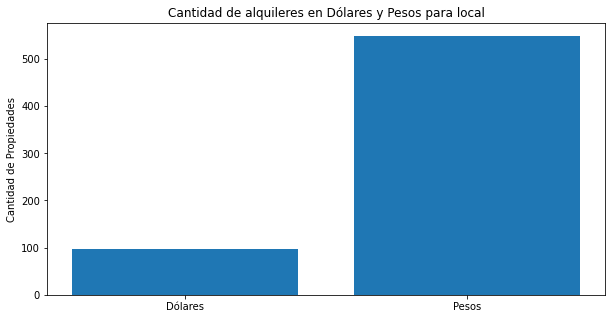

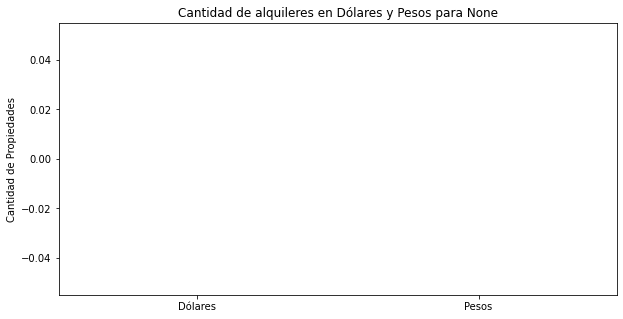

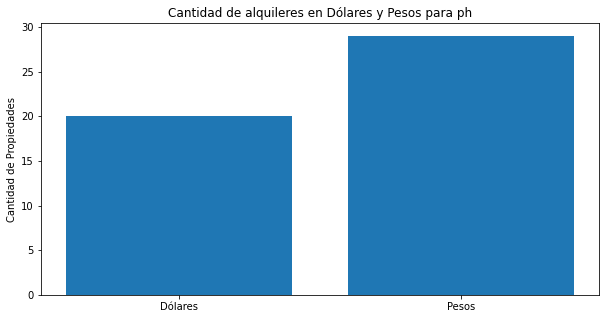

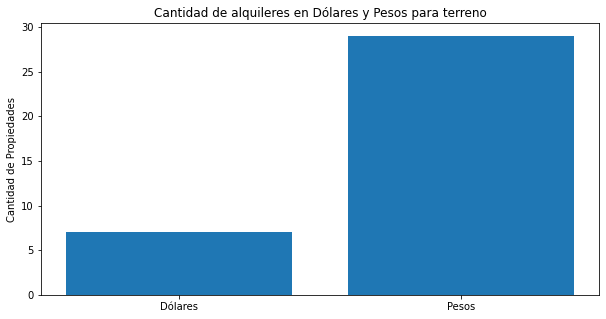

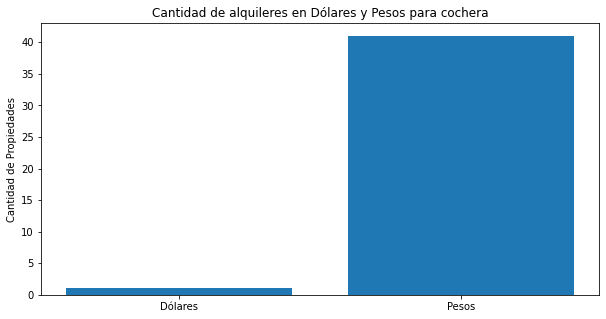

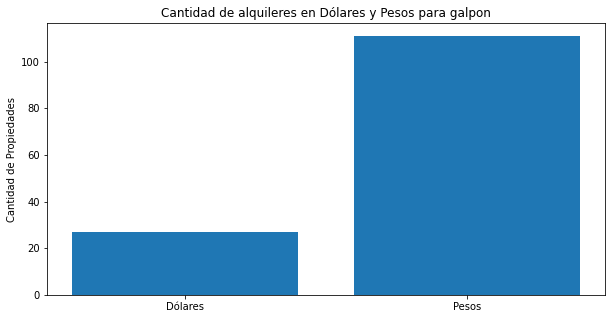

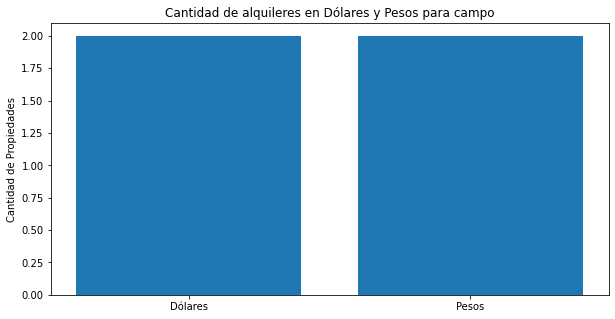

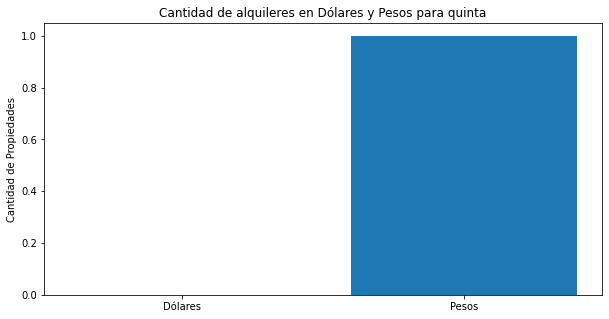

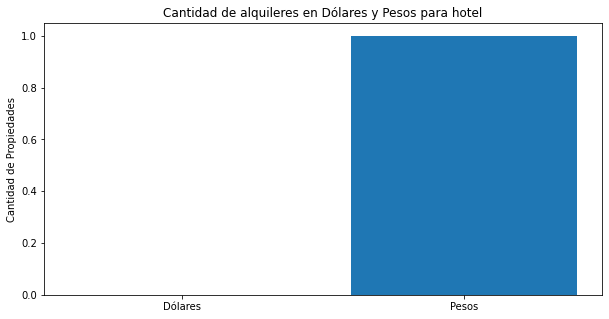

In [218]:
tipos = df['Tipo'].unique()

for tipo in tipos:
    # Filtramos los datos por tipo
    subset = df[df['Tipo'] == tipo]
    
    # Contamos cuántos están en dólares y cuántos en pesos
    dolares_count = subset['es_dolar'].sum()
    pesos_count = len(subset) - dolares_count
    
    # Gráfico de barras
    labels = ['Dólares', 'Pesos']
    values = [dolares_count, pesos_count]
    
    plt.figure(figsize=(10, 5))
    plt.bar(labels, values)
    plt.title(f'Cantidad de alquileres en Dólares y Pesos para {tipo}')
    plt.ylabel('Cantidad de Propiedades')
    plt.show()

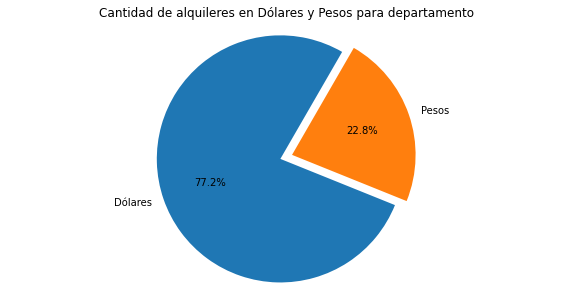

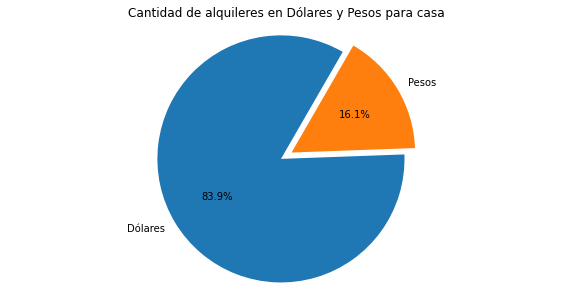

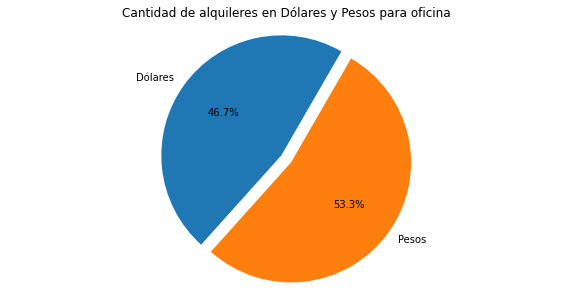

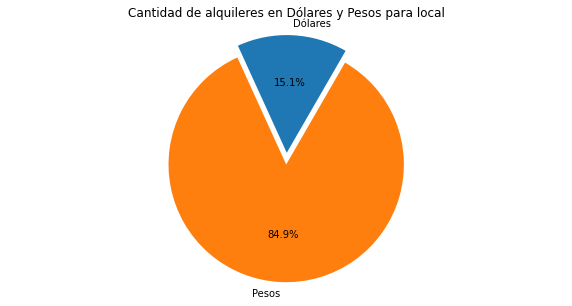

Saltando None porque todas las propiedades están en dólares.


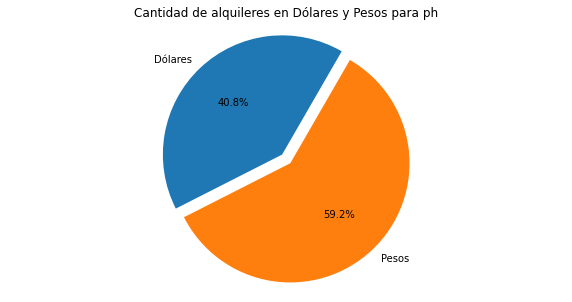

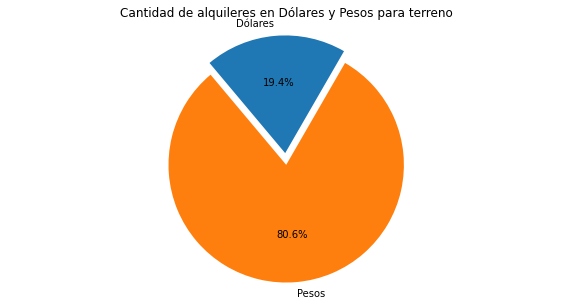

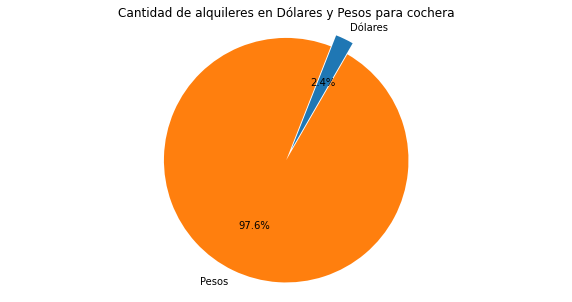

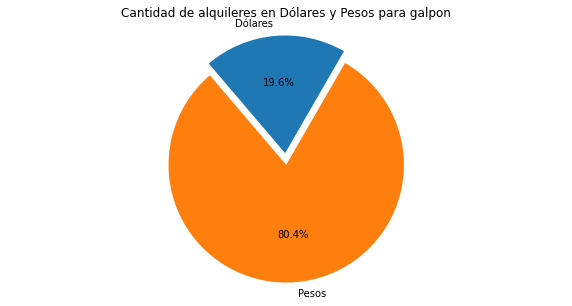

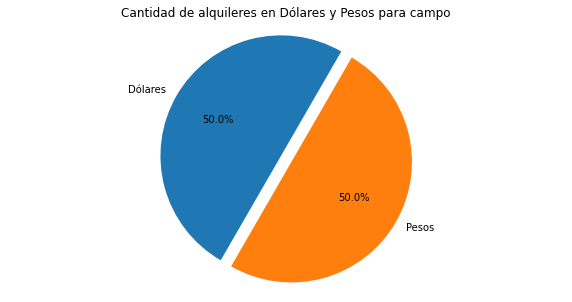

Saltando quinta porque todas las propiedades están en dólares.
Saltando hotel porque todas las propiedades están en dólares.


In [224]:
tipos = df['Tipo'].unique()

for tipo in tipos:
    # Filtramos los datos por tipo
    subset = df[df['Tipo'] == tipo]
    
    # Contamos cuántos están en dólares y cuántos en pesos
    dolares_count = subset['es_dolar'].sum()
    pesos_count = len(subset) - dolares_count

    # Si alguna de las cantidades es cero, continuamos con el siguiente tipo
    if dolares_count == 0 or pesos_count == 0:
        print(f"Saltando {tipo} porque todas las propiedades están en {'dólares' if dolares_count == 0 else 'pesos'}.")
        continue

    # Datos para el gráfico de torta
    labels = ['Dólares', 'Pesos']
    sizes = [dolares_count, pesos_count]
    explode = (0.1, 0)  # resaltar la primera sección (Dólares)
    
    plt.figure(figsize=(10, 5))
    plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=60)
    plt.axis('equal')  # Para que el gráfico sea un círculo perfecto
    plt.title(f'Cantidad de alquileres en Dólares y Pesos para {tipo}')
    plt.show()

Saltando None porque todas las propiedades están en dólares.
Saltando quinta porque todas las propiedades están en dólares.
Saltando hotel porque todas las propiedades están en dólares.


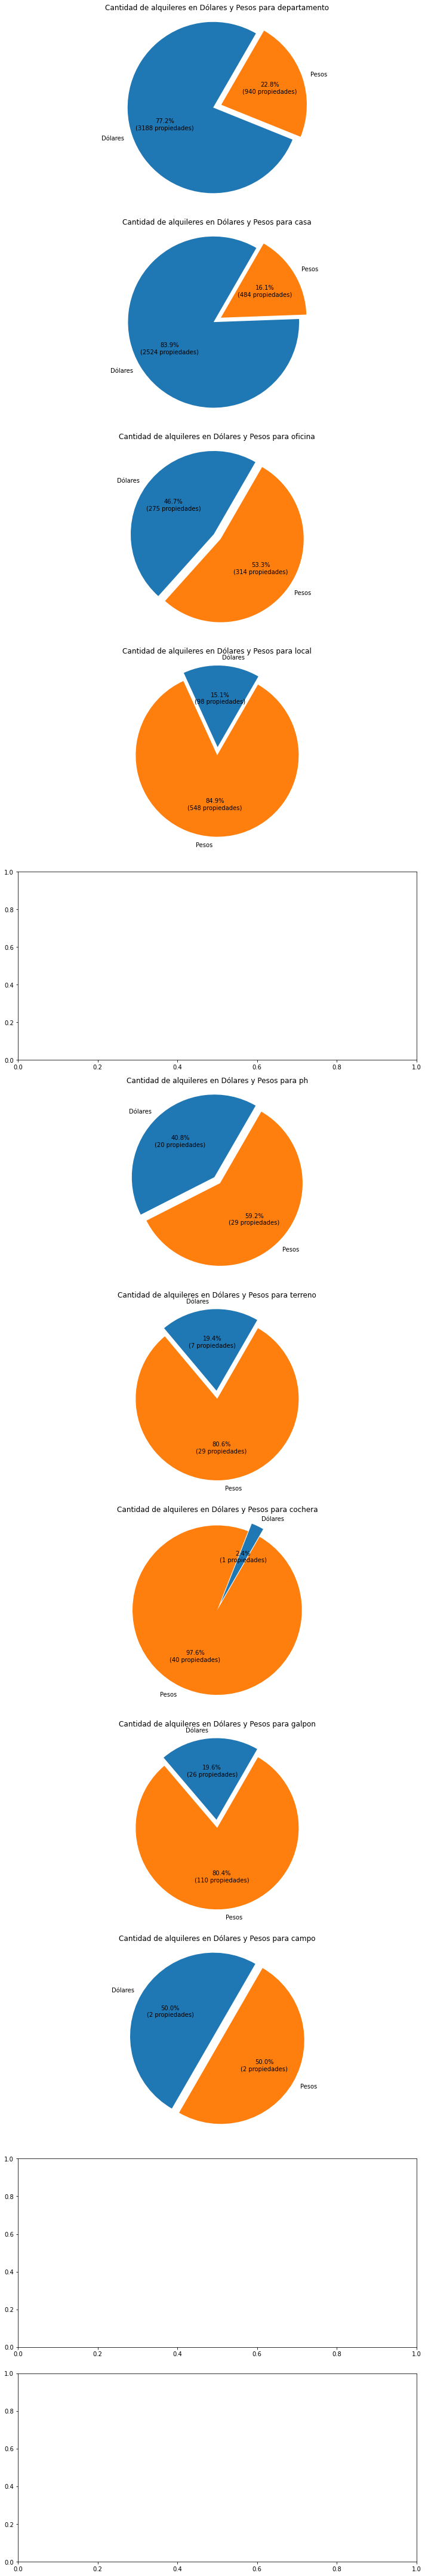

In [225]:
tipos = df['Tipo'].unique()

# Definimos el número de filas y columnas para los subplots basándonos en la cantidad de tipos únicos.
n_rows = len(tipos)
n_cols = 1  # Todas las gráficas en una sola columna

# Función personalizada para mostrar porcentaje y cantidad
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return f"{pct:.1f}%\n({absolute} propiedades)"

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5*n_rows))

for ax, tipo in zip(axes, tipos):
    # Filtramos los datos por tipo
    subset = df[df['Tipo'] == tipo]
    
    # Contamos cuántos están en dólares y cuántos en pesos
    dolares_count = subset['es_dolar'].sum()
    pesos_count = len(subset) - dolares_count

    # Si alguna de las cantidades es cero, continuamos con el siguiente tipo
    if dolares_count == 0 or pesos_count == 0:
        print(f"Saltando {tipo} porque todas las propiedades están en {'dólares' if dolares_count == 0 else 'pesos'}.")
        continue

    # Datos para el gráfico de torta
    labels = ['Dólares', 'Pesos']
    sizes = [dolares_count, pesos_count]
    explode = (0.1, 0)  # resaltar la primera sección (Dólares)
    
    ax.pie(sizes, explode=explode, labels=labels, autopct=lambda pct: func(pct, sizes), startangle=60)
    ax.axis('equal')  # Para que el gráfico sea un círculo perfecto
    ax.set_title(f'Cantidad de alquileres en Dólares y Pesos para {tipo}')

plt.tight_layout()  # Ajusta automáticamente el espacio entre gráficas para que no se solapen
plt.show()

In [226]:
df.Tipo.value_counts()

departamento    4129
casa            3008
local            647
oficina          589
galpon           138
ph                49
cochera           42
terreno           36
campo              4
quinta             1
hotel              1
Name: Tipo, dtype: int64

In [179]:
df.Barrio.value_counts().sample(50)

centro--12928870                                    1
saint-matthews-5-ambientes--12723337                1
cordoba-1-ambiente--12987954                        1
ayres-de-pilar-6-ambientes--12427295                1
mar-del-plata--14099965                             1
belgrano--13177549                                  1
pilar-4-ambientes--14211915                         1
palermo-1-ambiente--13647688                        2
palermo-5-ambientes--12541876                       2
palermo-5-ambientes--13070458                       2
rosario-1-ambiente--14040770                        1
villa-rosa-5-ambientes--11554664                    1
san-isidro-5-ambientes--12581671                    1
villanueva-6-ambientes--12469036                    1
nordelta-7-ambientes--14101153                      2
palermo--14134627                                   1
don-torcuato-5-ambientes--13204225                  1
otros-barrios-de-nordelta--11469233                 2
palermo-soho-1-ambiente--136

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8685 entries, 0 to 8684
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   URL                  8685 non-null   object 
 1   Ubicación            8685 non-null   object 
 2   Precio               8685 non-null   object 
 3   Sup. cubierta        7168 non-null   object 
 4   Antiguedad           3589 non-null   object 
 5   Baños                7730 non-null   object 
 6   Ambientes            3837 non-null   object 
 7   Disposición          1176 non-null   object 
 8   Expensas             8685 non-null   object 
 9   Dormitorios          6524 non-null   object 
 10  Cocheras             4353 non-null   object 
 11  Estado               2306 non-null   object 
 12  Orientación          1291 non-null   object 
 13  Apto profesional     612 non-null    object 
 14  Toilettes            437 non-null    object 
 15  Permite mascota      59 non-null     o

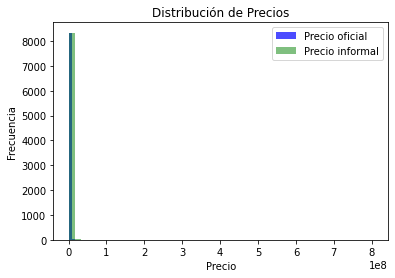

In [104]:
import matplotlib.pyplot as plt

plt.hist(df['Precio_oficial'], bins=50, color='blue', alpha=0.7, label='Precio oficial')
plt.hist(df['Precio_informal'], bins=50, color='green', alpha=0.5, label='Precio informal')
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

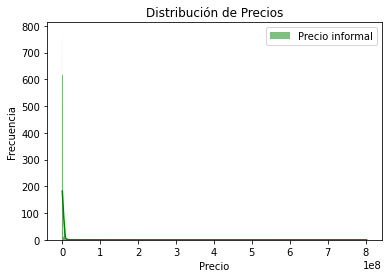

In [108]:
import seaborn as sns

sns.histplot(df, x="Precio_informal", color="green", label="Precio informal", kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


In [235]:
# Extraemos solo el valor numérico de la columna 'Sup. cubierta' usando una expresión regular
#df['Sup. cubierta'] = df['Sup. cubierta'].str.extract('(\d+)').astype(float)

# Cambiamos el nombre de la columna a 'sup_cubierta_m2'
df = df.rename(columns={'Sup. cubierta': 'sup_cubierta_m2'})

# Verificamos los cambios
print(df['sup_cubierta_m2'].head())


0    37.0
1    45.0
2    40.0
3    40.0
4    40.0
Name: sup_cubierta_m2, dtype: float64


In [237]:
df.corr()

/tmp/ipykernel_549847/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sup_cubierta_m2,FOT,es_dolar,Precio_oficial,Precio_informal
sup_cubierta_m2,1.000000,-1.0,0.199770,0.137156,0.174364
FOT,-1.000000,1.0,NaN,NaN,NaN
es_dolar,0.199770,NaN,1.000000,0.036636,0.064568
Precio_oficial,0.137156,NaN,0.036636,1.000000,0.974399
Precio_informal,0.174364,NaN,0.064568,0.974399,1.000000


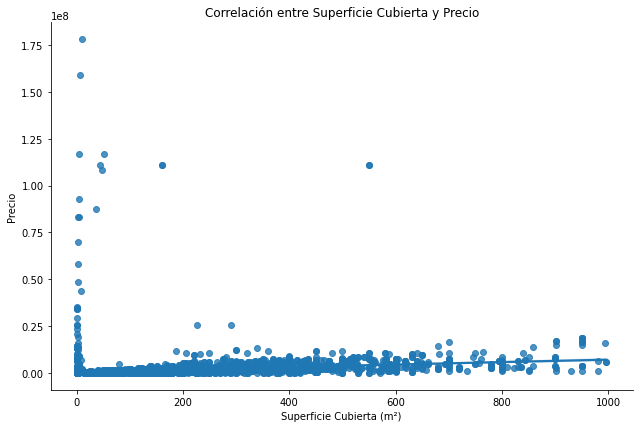

In [248]:
# Scatter plot con línea de regresión
sns.lmplot(data=df, x='sup_cubierta_m2', y='Precio_informal', aspect=1.5, height=6)

plt.title('Correlación entre Superficie Cubierta y Precio')
plt.xlabel('Superficie Cubierta (m²)')
plt.ylabel('Precio')

plt.show()

In [253]:
df[['sup_cubierta_m2','Precio_oficial']].sort_values('sup_cubierta_m2', ascending=False)

,sup_cubierta_m2,Precio_oficial
5287,996.0,2920000.0
2421,996.0,2920000.0
6095,994.0,7981820.0
3961,980.0,3285000.0
5083,980.0,900000.0
...,...,...
8643,NaN,474500.0
8644,NaN,200000.0
8645,NaN,220000.0
8668,NaN,22000.0


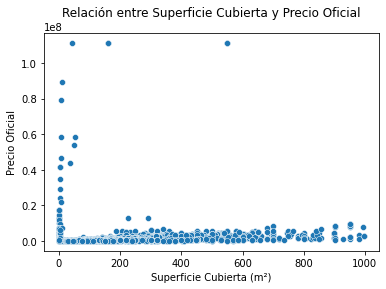

In [258]:

# Eliminar registros con valores NaN en 'sup_cubierta_m2'
df_filtered = df.dropna(subset=['sup_cubierta_m2'])

# Scatterplot
sns.scatterplot(data=df_filtered, x='sup_cubierta_m2', y='Precio_oficial')

plt.title('Relación entre Superficie Cubierta y Precio Oficial')
plt.xlabel('Superficie Cubierta (m²)')
plt.ylabel('Precio Oficial')

plt.show()

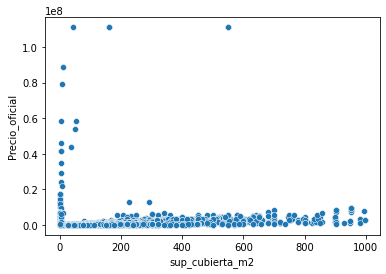

In [261]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='sup_cubierta_m2', y='Precio_oficial')
plt.show()


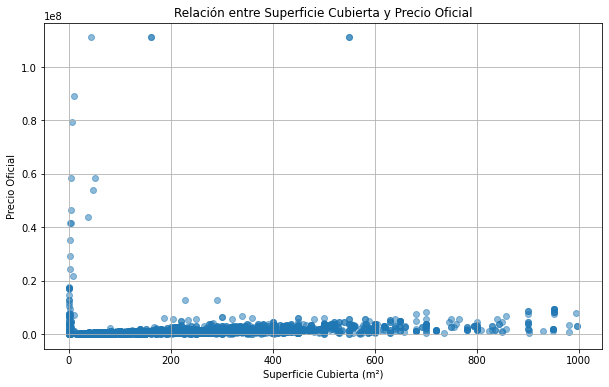

In [266]:
# Datos
x = df['sup_cubierta_m2']
y = df['Precio_oficial']

# Creación del scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)  # alpha es para la transparencia de los puntos

# Títulos y etiquetas
plt.title('Relación entre Superficie Cubierta y Precio Oficial')
plt.xlabel('Superficie Cubierta (m²)')
plt.ylabel('Precio Oficial')
plt.grid(True)  # Para mostrar una grilla en el gráfico

# Mostrar el gráfico
plt.show()

/tmp/ipykernel_549847/1816879827.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = filtered_df.corr()


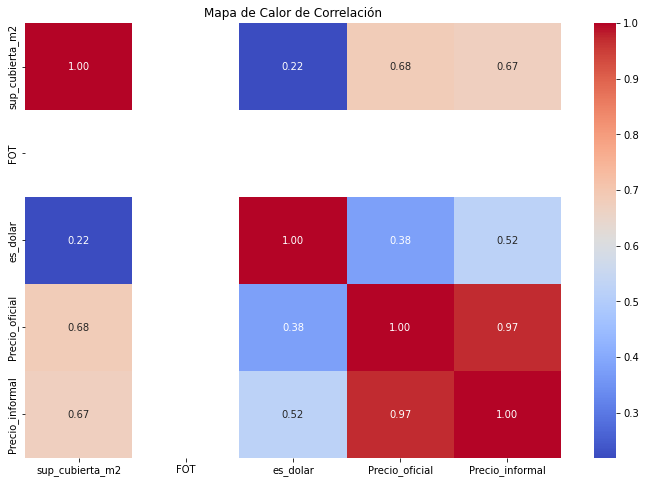

In [276]:
# Calcula la matriz de correlación
corr_matrix = filtered_df.corr()

# Configura el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crea el mapa de calor con seaborn
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Añade un título
plt.title("Mapa de Calor de Correlación")

# Muestra el gráfico
plt.show()

In [268]:
print(df['Precio_oficial'].describe())


count    8.392000e+03
mean     1.052817e+06
std      6.443950e+06
min      6.500000e+01
25%      2.400000e+05
50%      4.580750e+05
75%      9.125000e+05
max      4.015000e+08
Name: Precio_oficial, dtype: float64


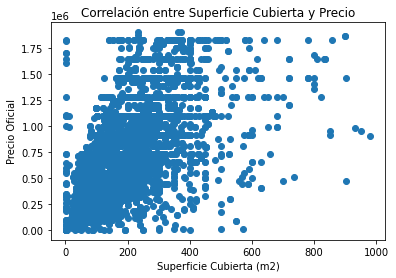

In [270]:
# Definir límites usando el rango intercuartil
IQR = df['Precio_oficial'].quantile(0.75) - df['Precio_oficial'].quantile(0.25)
lower_bound = df['Precio_oficial'].quantile(0.25) - 1.5 * IQR
upper_bound = df['Precio_oficial'].quantile(0.75) + 1.5 * IQR

# Filtrar datos
filtered_df = df[(df['Precio_oficial'] >= lower_bound) & (df['Precio_oficial'] <= upper_bound)]

# Graficar
plt.scatter(filtered_df['sup_cubierta_m2'], filtered_df['Precio_oficial'])
plt.xlabel('Superficie Cubierta (m2)')
plt.ylabel('Precio Oficial')
plt.title('Correlación entre Superficie Cubierta y Precio')
plt.show()


In [275]:
filtered_df.corr()


/tmp/ipykernel_549847/1493666945.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  filtered_df.corr()


,sup_cubierta_m2,FOT,es_dolar,Precio_oficial,Precio_informal
sup_cubierta_m2,1.000000,NaN,0.218982,0.683369,0.671459
FOT,NaN,NaN,NaN,NaN,NaN
es_dolar,0.218982,NaN,1.000000,0.378762,0.522290
Precio_oficial,0.683369,NaN,0.378762,1.000000,0.972167
Precio_informal,0.671459,NaN,0.522290,0.972167,1.000000


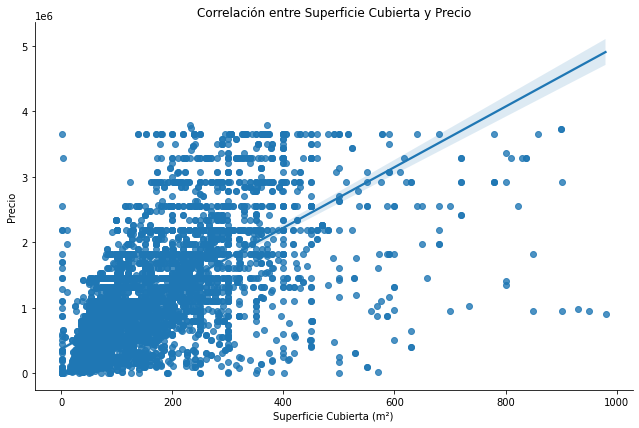

In [278]:
# Scatter plot con línea de regresión
sns.lmplot(data=filtered_df, x='sup_cubierta_m2', y='Precio_informal', aspect=1.5, height=6)

plt.title('Correlación entre Superficie Cubierta y Precio')
plt.xlabel('Superficie Cubierta (m²)')
plt.ylabel('Precio')

plt.show()

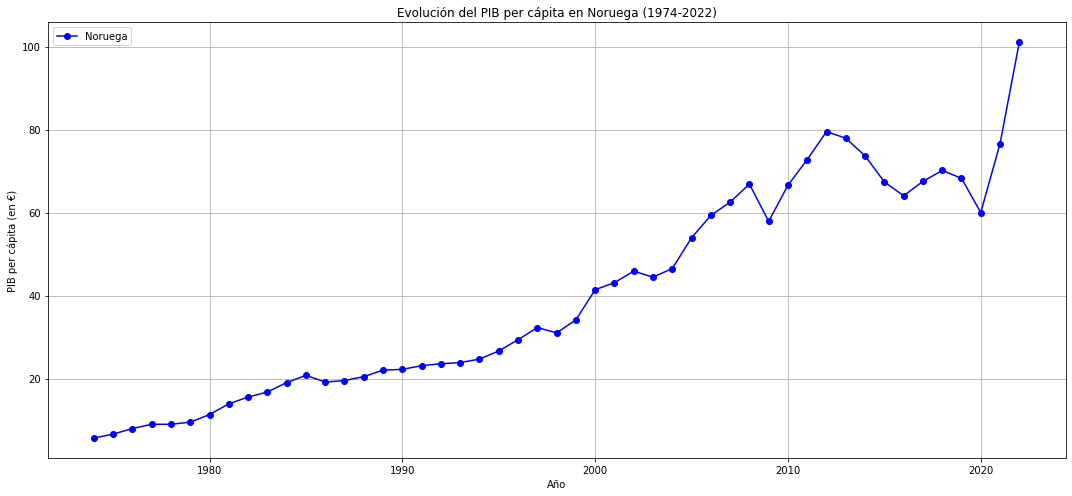

In [281]:
# Datos proporcionados
años = list(range(1974, 2023))
pbi_noruega = [
    5.700, 6.630, 7.990, 9.000, 9.010, 9.520, 11.350, 13.940, 15.560, 16.780, 
    19.060, 20.800, 19.190, 19.530, 20.490, 22.050, 22.240, 23.120, 23.590, 
    23.870, 24.700, 26.670, 29.370, 32.310, 31.020, 34.150, 41.420, 43.120, 
    45.900, 44.450, 46.520, 53.940, 59.320, 62.520, 66.870, 57.890, 66.580, 
    72.790, 79.510, 77.920, 73.670, 67.390, 64.060, 67.520, 70.150, 68.270, 
    60.020, 76.630, 101.050
]

plt.figure(figsize=(15, 7))
plt.plot(años, pbi_noruega, label="Noruega", marker='o', color='blue')

plt.title("Evolución del PIB per cápita en Noruega (1974-2022)")
plt.xlabel("Año")
plt.ylabel("PIB per cápita (en €)")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

ValueError: x and y must have same first dimension, but have shapes (50,) and (51,)

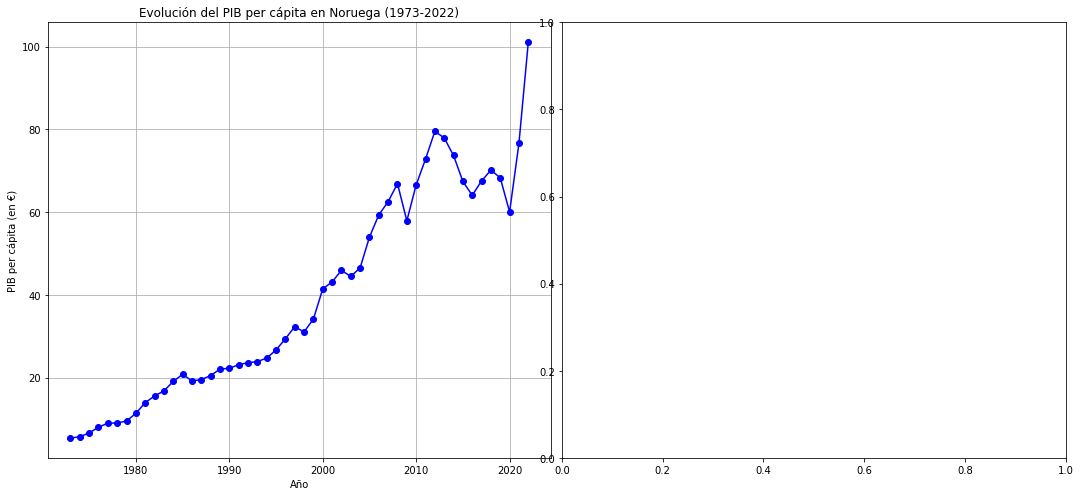

In [284]:
# Datos proporcionados
# Datos proporcionados
años = list(range(1973, 2023))
pbi_noruega = [
    5.400, 5.700, 6.630, 7.990, 9.000, 9.010, 9.520, 11.350, 13.940, 15.560, 
    16.780, 19.060, 20.800, 19.190, 19.530, 20.490, 22.050, 22.240, 23.120, 
    23.590, 23.870, 24.700, 26.670, 29.370, 32.310, 31.020, 34.150, 41.420, 
    43.120, 45.900, 44.450, 46.520, 53.940, 59.320, 62.520, 66.870, 57.890, 
    66.580, 72.790, 79.510, 77.920, 73.670, 67.390, 64.060, 67.520, 70.150, 
    68.270, 60.020, 76.630, 101.050
]

# Estimación del empleo público (porcentaje del total del empleo)
empleo_publico_noruega = [
    32.3, 32.5, 32.8, 33.1, 33.2, 33.4, 33.7, 33.9, 34, 34.1, 
    34.2, 34.4, 34.5, 34.6, 34.7, 34.9, 35, 35.1, 35.2, 35.3, 
    35.5, 35.6, 35.7, 35.8, 36, 36.1, 36.2, 36.3, 36.5, 36.6, 
    36.7, 36.8, 37, 37.1, 37.2, 37.3, 37.5, 37.6, 37.7, 37.8, 
    38, 38.1, 38.2, 38.3, 38.5, 38.6, 38.7, 38.8, 39, 39.1, 39.2
]

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.plot(años, pbi_noruega, label="PIB per cápita", marker='o', color='blue')
plt.title("Evolución del PIB per cápita en Noruega (1973-2022)")
plt.xlabel("Año")
plt.ylabel("PIB per cápita (en €)")
plt.grid(True)
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.plot(años, empleo_publico_noruega, label="Empleo Público (%)", marker='o', color='green')
plt.title("Estimación de la evolución del empleo público en Noruega (1973-2022)")
plt.xlabel("Año")
plt.ylabel("Empleo público (%)")
plt.grid(True)
plt.tight_layout()

plt.show()

In [286]:
df_lauti = pd.read_csv('/home/pablo/Descargas/BTC_1462849200-1473303599_graph_coinmarketcap.csv', sep=';')
df_lauti

,open,high,low,close,volume,marketCap,timestamp
0,450.864014,454.575989,450.864014,452.727997,50605200,7.032699e+09,2016-05-11T00:00:00.000Z
1,452.446991,454.949005,449.250000,454.765991,59849300,7.065961e+09,2016-05-12T00:00:00.000Z
2,454.850006,457.054993,453.453003,455.670013,60845000,7.081727e+09,2016-05-13T00:00:00.000Z
3,455.822998,456.835999,454.786011,455.670990,37209000,7.083394e+09,2016-05-14T00:00:00.000Z
4,455.759003,458.691986,455.459015,457.567993,28514000,7.114462e+09,2016-05-15T00:00:00.000Z
...,...,...,...,...,...,...,...
116,598.590027,611.836975,596.848022,608.633972,97942896,9.646846e+09,2016-09-04T00:00:00.000Z
117,608.989990,609.054993,602.242004,606.590027,82446800,9.615468e+09,2016-09-05T00:00:00.000Z
118,606.505981,610.830017,605.091003,610.435974,78529104,9.677437e+09,2016-09-06T00:00:00.000Z
119,610.572998,614.544983,608.513000,614.544006,75032400,9.743676e+09,2016-09-07T00:00:00.000Z


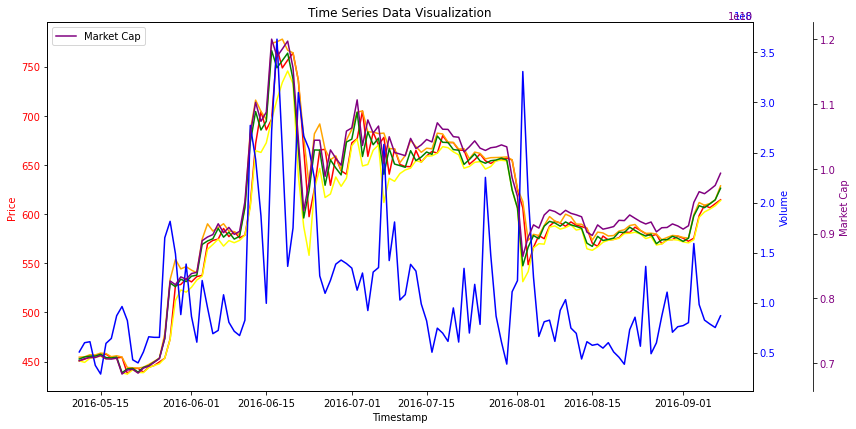

In [288]:
# Asumiendo que df_lauti ya está definido y tiene los datos que has proporcionado
df_lauti['timestamp'] = pd.to_datetime(df_lauti['timestamp'])

# Gráfico de las series temporales
fig, ax1 = plt.subplots(figsize=(12,6))

color = 'red'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Price', color=color)
ax1.plot(df_lauti['timestamp'], df_lauti['open'], color=color, label="Open")
ax1.plot(df_lauti['timestamp'], df_lauti['high'], color='orange', label="High")
ax1.plot(df_lauti['timestamp'], df_lauti['low'], color='yellow', label="Low")
ax1.plot(df_lauti['timestamp'], df_lauti['close'], color='green', label="Close")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'blue'
ax2.set_ylabel('Volume', color=color)
ax2.plot(df_lauti['timestamp'], df_lauti['volume'], color=color, label="Volume")
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()
color = 'purple'
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('Market Cap', color=color)
ax3.plot(df_lauti['timestamp'], df_lauti['marketCap'], color=color, label="Market Cap")
ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Time Series Data Visualization')
plt.legend(loc="upper left")
plt.show()

In [290]:

# Asumiendo que df_lauti ya está definido y tiene los datos que has proporcionado.
# También vamos a asumir que las columnas están en el orden correcto y los nombres están bien escritos.
import mplfinance as mpf
# Convertimos la columna timestamp en el índice del dataframe.
df_lauti['timestamp'] = pd.to_datetime(df_lauti['timestamp'])
df_lauti.set_index('timestamp', inplace=True)

# Creamos el gráfico de velas.
mpf.plot(df_lauti, type='candle', style='charles', title='Gráfico de Velas',
         ylabel='Precio', ylabel_lower='Volumen', volume=True, mav=(3,6,9))

ModuleNotFoundError: No module named 'mplfinance'

In [293]:
pip install mplfinance

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [294]:

# Asumiendo que df_lauti ya está definido y tiene los datos que has proporcionado.
# También vamos a asumir que las columnas están en el orden correcto y los nombres están bien escritos.
import mplfinance as mpf
# Convertimos la columna timestamp en el índice del dataframe.
df_lauti['timestamp'] = pd.to_datetime(df_lauti['timestamp'])
df_lauti.set_index('timestamp', inplace=True)

# Creamos el gráfico de velas.
mpf.plot(df_lauti, type='candle', style='charles', title='Gráfico de Velas',
         ylabel='Precio', ylabel_lower='Volumen', volume=True, mav=(3,6,9))

KeyError: 'timestamp'